In [2]:
import requests
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
API_KEY = "dmlO1fVQRPKI-GrVIYJ1YA"

In [91]:
def get_url(zoom, x, y):
    return f"https://tile.nextzen.org/tilezen/terrain/v1/256/terrarium/{zoom}/{yy}/x{x}.png?api_key={API_KEY}"
get_url(0, 10, 10)

'https://tile.nextzen.org/tilezen/terrain/v1/256/terrarium/0/10/10.png?api_key=dmlO1fVQRPKI-GrVIYJ1YA'

In [4]:
Image(url=get_url(1, 1, 1))

In [5]:
req = requests.get(get_url(1, 1, 1));

In [6]:
from PIL import Image
import numpy as np
import pandas as pd
import io

img = Image.open(io.BytesIO(req.content))
data = np.asarray(img)


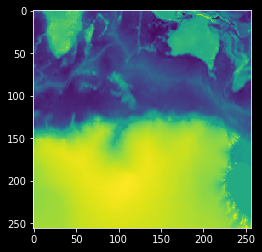

In [7]:
d1 = data.reshape((-1, 4))
r = d1[:, 0]
g = d1[:, 1]
b = d1[:, 2]

d = (r * 256 + g + b / 256) - 32768
pd.Series(d).describe()
plt.imshow(d.reshape(256,256))

In [58]:

class ImageNotFoundException (Exception):
    pass

def get_height(zoom, x, y):
    req = requests.get(get_url(zoom, x, y))
    if req.status_code != 200:
        raise ImageNotFoundException
    img_data = np.asarray(Image.open(io.BytesIO(req.content)))
    return unpack_height(img_data)

def unpack_height(img_data):
    size = img_data.shape[:2]
    flat_data = img_data.reshape((-1, 4))
    r = flat_data[:, 0]
    g = flat_data[:, 1]
    b = flat_data[:, 2]
    d = (r * 256 + g + b / 256) - 32768
    return d.reshape(size)

def normalize_data(img_height, low = -100, high = 100):
    return (np.clip(img_height, low, high) / (high - low) + 0.5) * 255

def save_height(img_height, filename):
    normalized_height = normalize_data(img_height)
    Image.fromarray(normalized_height).convert("RGB").save(filename)
    print(f"Image saved at {filename}")


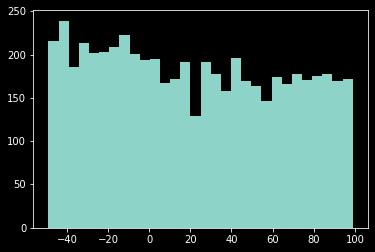

In [28]:

normalized_height = (np.clip(height, -50, 100) / 150 + 0.5) * 255
n = np.clip(height, -50, 100).reshape(-1)
plt.hist(n[(n != 100) & (n != -50)], bins=30);

#Image.fromarray(normalized_height).convert("RGB").save("tile0.png")

In [34]:
f"{2:03}"

'002'

In [90]:
dirs = os.listdir(folder)
dirs.sort()
dirs = [x for x in dirs if x.startswith("height")]
os.mkdir(f"{folder}2")
for d in dirs:
    ds = d.split(".")[0].split("_")
    ds[3], ds[4] = ds[4], ds[3]
    d2 = "_".join(ds) + ".png"
    os.rename(f"{folder}/{d}", f"{folder}2/{d2}")

